In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2021-02.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.923536,6.925439,50.940574,6.968034,2021-02-20 11:31:01,2021-02-20 13:10:03,99.0,3537.0,41642186,41660078,1046.0,NaN,BIKE 22449,612
1,50.940574,6.968034,50.940300,6.968321,2021-02-20 13:10:03,2021-02-20 13:11:01,1.0,36.0,41660078,41660338,0.0,NaN,BIKE 22449,636
2,50.940300,6.968321,50.921751,6.925827,2021-02-20 14:22:02,2021-02-20 15:30:02,68.0,3624.0,41660338,41665223,71.0,NaN,BIKE 22449,638
3,50.921751,6.925827,50.933906,6.929564,2021-02-20 16:05:02,2021-02-20 16:16:02,11.0,1377.0,41665223,41667619,35.0,NaN,BIKE 22449,581
4,50.933906,6.929564,50.931093,6.932945,2021-02-20 17:16:01,2021-02-20 19:25:01,129.0,392.0,41667619,41671008,60.0,NaN,BIKE 22449,587


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

32937

In [14]:
len(out_distances_total)

5004

In [15]:
len(out_rides)

4500

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

7031

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

2473

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

14.0      49
15.0      43
7.0       42
4.0       41
12.0      39
8.0       38
6.0       38
24.0      37
9.0       36
13.0      35
17.0      35
11.0      35
5.0       34
22.0      34
10.0      30
20.0      30
27.0      29
26.0      27
23.0      26
21.0      26
42.0      26
16.0      25
28.0      25
3.0       25
35.0      25
33.0      25
25.0      25
34.0      24
30.0      23
19.0      23
          ..
3977.0     1
1818.0     1
5899.0     1
3317.0     1
4708.0     1
7980.0     1
4649.0     1
3935.0     1
4196.0     1
3450.0     1
6147.0     1
3789.0     1
5752.0     1
5261.0     1
4945.0     1
5415.0     1
6512.0     1
1622.0     1
3031.0     1
2356.0     1
9522.0     1
7760.0     1
3032.0     1
6176.0     1
8459.0     1
3880.0     1
6611.0     1
3861.0     1
3735.0     1
4312.0     1
Name: distance, Length: 5484, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

2531

In [23]:
len(out_distances + out_rides)

7031

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

21.3468136138689


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25906 entries, 0 to 25905
Data columns (total 15 columns):
index                   25906 non-null int64
lat_begin               25906 non-null float64
lng_begin               25906 non-null float64
lat_end                 25906 non-null float64
lng_end                 25906 non-null float64
ride_begin              25906 non-null object
ride_end                25906 non-null object
ride_time               25906 non-null float64
distance                25906 non-null float64
uid_begin               25906 non-null int64
uid_end                 25906 non-null int64
standing_before_ride    25906 non-null float64
address                 194 non-null object
name                    25906 non-null object
available_bikes         25906 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 3.0+ MB


In [27]:
df_c['distance'].value_counts()

537.0      21
646.0      20
832.0      19
555.0      19
909.0      19
535.0      19
452.0      19
601.0      18
1292.0     18
532.0      18
481.0      18
541.0      18
357.0      18
811.0      17
580.0      17
394.0      17
708.0      17
667.0      17
912.0      17
1537.0     17
886.0      17
973.0      17
536.0      17
505.0      17
740.0      17
1013.0     16
670.0      16
612.0      16
1436.0     16
369.0      16
           ..
4915.0      1
7994.0      1
2194.0      1
9834.0      1
6172.0      1
9637.0      1
3899.0      1
5399.0      1
5232.0      1
7682.0      1
6580.0      1
3436.0      1
10717.0     1
4699.0      1
5157.0      1
6678.0      1
5402.0      1
5550.0      1
5132.0      1
7508.0      1
3706.0      1
4818.0      1
9447.0      1
3360.0      1
3911.0      1
6137.0      1
5457.0      1
9313.0      1
8260.0      1
3738.0      1
Name: distance, Length: 5277, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

8.0      959
9.0      943
12.0     912
10.0     905
11.0     902
13.0     895
14.0     866
7.0      862
6.0      818
15.0     792
18.0     755
16.0     745
17.0     718
19.0     679
20.0     635
21.0     606
22.0     570
23.0     528
24.0     504
25.0     487
5.0      483
27.0     442
26.0     435
28.0     396
29.0     372
30.0     349
31.0     326
32.0     307
33.0     287
34.0     234
        ... 
694.0      1
650.0      1
326.0      1
458.0      1
606.0      1
646.0      1
551.0      1
293.0      1
648.0      1
460.0      1
473.0      1
600.0      1
409.0      1
432.0      1
488.0      1
456.0      1
544.0      1
383.0      1
477.0      1
496.0      1
550.0      1
645.0      1
339.0      1
601.0      1
675.0      1
634.0      1
379.0      1
690.0      1
517.0      1
459.0      1
Name: ride_time, Length: 569, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[12,
 14,
 69,
 139,
 160,
 237,
 238,
 269,
 314,
 315,
 323,
 324,
 345,
 357,
 364,
 387,
 406,
 408,
 523,
 531,
 545,
 574,
 580,
 594,
 638,
 710,
 715,
 725,
 869,
 883,
 897,
 909,
 929,
 957,
 958,
 1033,
 1065,
 1078,
 1102,
 1112,
 1154,
 1161,
 1237,
 1409,
 1502,
 1512,
 1545,
 1552,
 1603,
 1615,
 1617,
 1653,
 1654,
 1685,
 1712,
 1721,
 1723,
 1743,
 1766,
 1782,
 1823,
 1824,
 1846,
 1880,
 1908,
 1971,
 1978,
 1986,
 2021,
 2081,
 2143,
 2144,
 2163,
 2176,
 2184,
 2250,
 2278,
 2336,
 2382,
 2459,
 2503,
 2549,
 2572,
 2598,
 2686,
 2717,
 2756,
 2784,
 2811,
 2940,
 2948,
 2949,
 2990,
 3000,
 3079,
 3104,
 3117,
 3147,
 3169,
 3173,
 3203,
 3216,
 3322,
 3332,
 3347,
 3381,
 3407,
 3416,
 3425,
 3454,
 3490,
 3498,
 3615,
 3624,
 3645,
 3697,
 3698,
 3724,
 3725,
 3754,
 3757,
 3833,
 3883,
 3886,
 3899,
 3913,
 3914,
 3997,
 4022,
 4030,
 4041,
 4064,
 4077,
 4087,
 4122,
 4149,
 4160,
 4186,
 4188,
 4208,
 4223,
 4248,
 4270,
 4271,
 4305,
 4339,
 4437,
 4452,
 4

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
12,15,50.938225,6.973634,50.940144,6.976239,2021-02-01 08:29:01,2021-02-01 08:34:01,5.0,281.0,41254942,41268919,509.0,NaN,BIKE 23656,743
14,17,50.937669,7.001403,50.938215,7.005237,2021-02-01 16:10:01,2021-02-01 16:14:01,4.0,276.0,41276102,41277952,76.0,NaN,BIKE 23656,711
69,81,50.924776,6.925393,50.922856,6.926061,2021-02-07 16:22:01,2021-02-07 16:57:01,35.0,219.0,41408742,41419111,960.0,NaN,BIKE 22088,716
139,173,50.928574,6.956827,50.930334,6.954659,2021-02-01 19:04:02,2021-02-01 19:17:02,13.0,248.0,41259752,41282299,1144.0,NaN,BIKE 210205,743
160,196,50.934707,6.988362,50.932165,6.989136,2021-02-17 11:52:01,2021-02-17 12:10:02,18.0,288.0,41565024,41584181,97.0,NaN,BIKE 21883,648
237,296,50.924302,6.978909,50.922348,6.981543,2021-02-11 13:29:02,2021-02-11 13:35:02,6.0,285.0,41477867,41481694,280.0,NaN,BIKE 21636,650
238,297,50.922348,6.981543,50.924161,6.978946,2021-02-11 13:46:01,2021-02-11 13:50:01,4.0,272.0,41481694,41481990,11.0,NaN,BIKE 21636,624
269,335,50.915307,6.919106,50.916749,6.921660,2021-02-01 11:02:01,2021-02-01 11:07:02,5.0,240.0,41261889,41271751,662.0,NaN,BIKE 22039,743
314,404,50.941744,6.955441,50.940494,6.952900,2021-02-23 21:25:01,2021-02-23 21:36:02,11.0,226.0,41769015,41773285,153.0,NaN,BIKE 22487,587
315,408,50.954230,6.957276,50.955252,6.960104,2021-02-27 17:08:01,2021-02-27 19:34:02,146.0,228.0,41903309,41909933,37.0,NaN,BIKE 22487,637


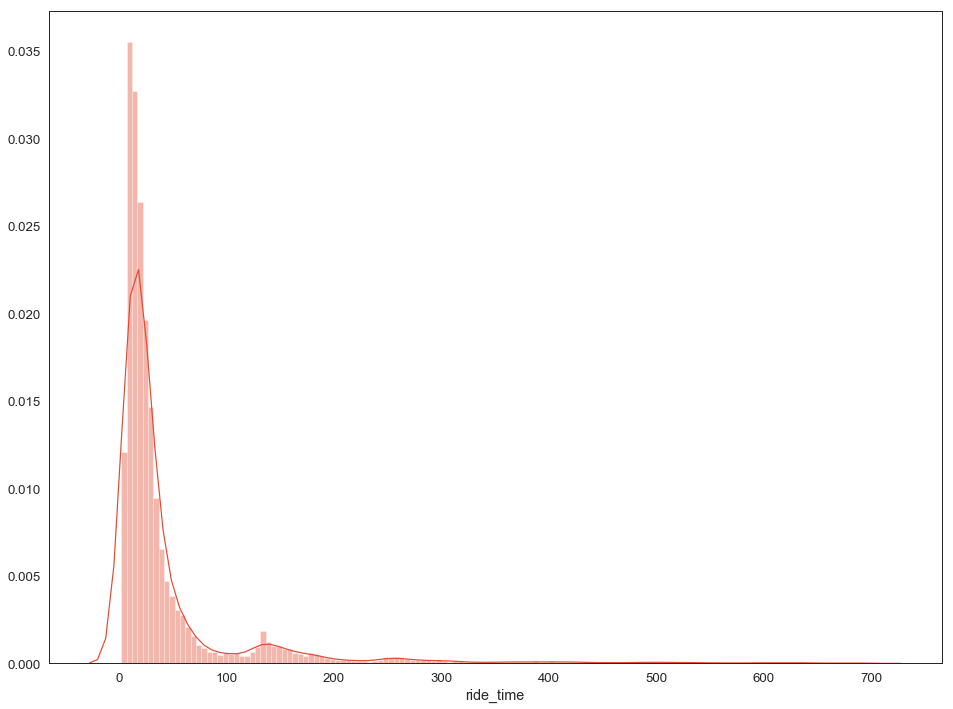

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

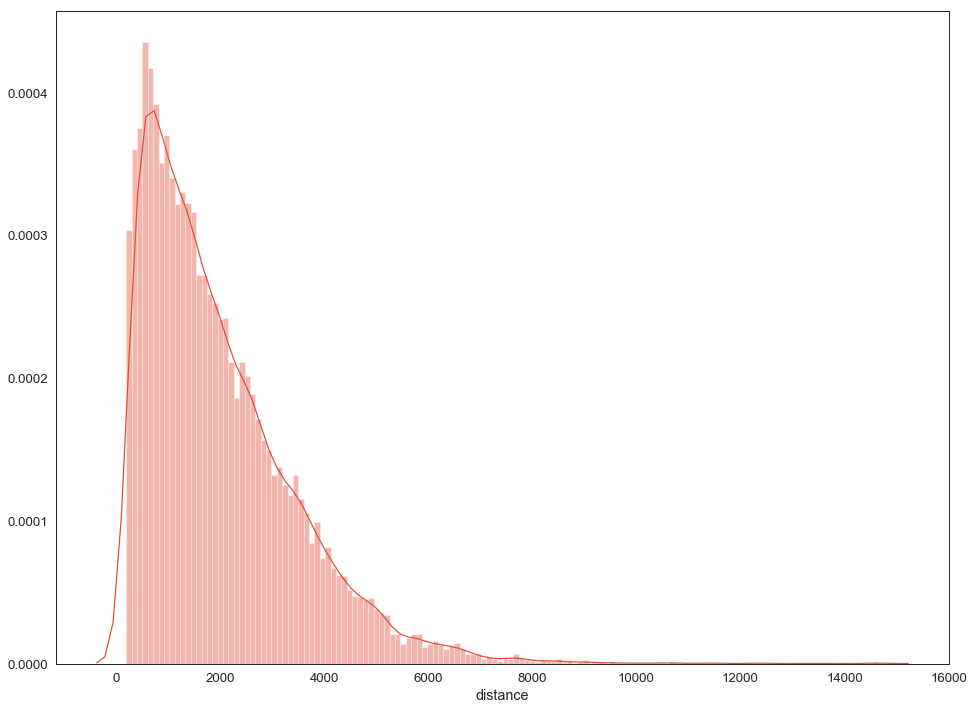

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
171,209,50.937500,6.998149,50.937101,6.978024,2021-02-24 13:54:01,2021-02-24 14:09:01,15.0,1411.0,41786326,41790797,115.0,"Kalk Post, U-Bahn",BIKE 21883,684
232,288,50.934340,6.956375,50.923434,6.959950,2021-02-04 13:27:02,2021-02-04 13:40:01,13.0,1239.0,41324849,41343814,1201.0,Hohe Straße 4 - 8,BIKE 21636,684
520,701,50.948686,6.949379,50.949992,6.933892,2021-02-07 14:41:01,2021-02-07 14:49:01,8.0,1095.0,41387118,41417582,2316.0,Maybachstraße 102,BIKE 22397,720
651,938,50.938431,6.932356,50.943525,6.919953,2021-02-25 11:48:02,2021-02-25 11:56:02,8.0,1038.0,41804725,41824719,1032.0,Moltkestraße 101,BIKE 22737,586
889,1239,50.938023,6.960420,50.926305,6.965957,2021-02-15 09:43:01,2021-02-15 12:05:01,142.0,1360.0,41529686,41546837,1380.0,Lintgasse 11,BIKE 22230,641
1200,1656,50.959098,7.006415,50.955767,7.006743,2021-02-21 15:50:01,2021-02-21 17:27:02,97.0,371.0,41697692,41701632,8.0,"Jan-Wellem-Straße 23, 51065 Köln",BIKE 21101,492
1279,1751,50.913195,6.922680,50.921736,6.904471,2021-02-04 23:52:02,2021-02-05 00:01:02,9.0,1592.0,41353876,41359731,299.0,Sülzgürtel & Berrenrather Straße 50937 Köln,BIKE 21565,665
1460,1966,50.939298,6.910778,50.955136,6.905143,2021-02-16 11:48:02,2021-02-16 14:51:01,183.0,1805.0,41555654,41563729,834.0,Köln - Oskar-Jäger-Straße,BIKE 22246,596
1553,2091,50.911178,6.911708,50.922776,6.927573,2021-02-28 16:20:01,2021-02-28 16:52:01,32.0,1703.0,41932176,41935886,40.0,Beethovenpark,BIKE 210191,578
2181,2884,50.976912,6.959735,50.974347,6.963403,2021-02-01 17:18:02,2021-02-01 17:34:01,16.0,384.0,41273741,41279862,255.0,Niehlerstr. 365,BIKE 22972,719


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
1260,1727,50.929769,6.917297,50.927938,6.908384,2021-02-15 15:54:01,2021-02-15 16:06:01,12.0,657.0,41537593,41550449,1205.0,NaN,BIKE 23685,607
1261,1728,50.927938,6.908384,50.929679,6.917342,2021-02-15 17:17:01,2021-02-15 17:24:02,7.0,657.0,41550449,41552088,71.0,NaN,BIKE 23685,609
1358,1843,50.938570,6.974053,50.959755,6.897588,2021-02-07 13:13:01,2021-02-07 13:49:01,36.0,5854.0,41374645,41416637,2780.0,NaN,BIKE 22960,682
1359,1844,50.959755,6.897588,50.938076,6.973711,2021-02-08 03:33:02,2021-02-08 04:09:01,36.0,5854.0,41416637,41425831,824.0,NaN,BIKE 22960,729
1595,2139,50.955727,6.910238,50.941070,6.969688,2021-02-14 15:05:02,2021-02-14 15:43:01,38.0,4474.0,41532317,41533884,58.0,NaN,BIKE 210209,586
1596,2140,50.941070,6.969688,50.955726,6.910228,2021-02-14 16:32:02,2021-02-14 17:02:01,30.0,4474.0,41533884,41535168,49.0,NaN,BIKE 210209,602
1739,2307,50.939600,6.936038,50.948226,6.917488,2021-02-26 18:12:02,2021-02-26 18:23:02,11.0,1616.0,41871054,41877163,145.0,NaN,BIKE 23628,679
1740,2308,50.948226,6.917488,50.939514,6.935933,2021-02-26 19:07:02,2021-02-26 19:15:01,8.0,1616.0,41877163,41879066,44.0,NaN,BIKE 23628,628
1931,2573,50.922277,6.921288,50.938753,6.907990,2021-02-11 19:01:01,2021-02-11 19:14:01,13.0,2056.0,41487204,41487746,16.0,NaN,BIKE 22708,614
1932,2574,50.938753,6.907990,50.924450,6.926559,2021-02-11 23:04:02,2021-02-11 23:20:02,16.0,2056.0,41487746,41490429,230.0,NaN,BIKE 22708,609


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
1004,1390,50.955568,6.953951,50.975293,6.950657,2021-02-20 14:00:02,2021-02-20 14:02:01,2.0,2206.0,41652477,41662069,611.0,NaN,BIKE 22735,695,1500.0
2182,2885,50.974347,6.963403,50.925279,6.920757,2021-02-02 13:35:01,2021-02-02 13:43:02,8.0,6222.0,41279862,41296709,1201.0,NaN,BIKE 22972,722,4000.0
2215,2922,50.963032,6.981807,50.942815,6.950750,2021-02-24 13:12:01,2021-02-24 13:15:02,3.0,3129.0,41787929,41788683,19.0,NaN,BIKE 22972,669,1500.0
2217,2924,50.944282,6.943823,50.964125,6.999385,2021-02-24 16:34:02,2021-02-24 16:36:02,2.0,4475.0,41795846,41797931,36.0,NaN,BIKE 22972,644,1500.0
3507,4699,50.959833,6.996645,50.916036,6.947767,2021-02-03 17:23:01,2021-02-03 17:31:01,8.0,5956.0,41187453,41324988,3923.0,NaN,BIKE 22933,743,4000.0
4994,6617,50.917712,6.908132,50.879784,7.075020,2021-02-03 21:00:01,2021-02-03 21:25:02,25.0,12444.0,41317561,41329730,532.0,NaN,BIKE 22104,737,11500.0
6528,8523,50.942117,6.958183,50.942277,6.996771,2021-02-15 20:04:01,2021-02-15 20:05:33,2.0,2705.0,41547917,41554090,400.0,NaN,BIKE 23657,617,1500.0
6639,8672,50.904784,6.957495,50.919210,6.933544,2021-02-15 20:04:01,2021-02-15 20:05:33,2.0,2323.0,41526938,41554311,2345.0,NaN,BIKE 21442,639,1500.0
7669,9952,50.969966,6.942680,50.998281,6.902189,2021-02-09 14:02:02,2021-02-09 14:10:02,8.0,4238.0,41445406,41447972,203.0,NaN,BIKE 22742,698,4000.0
8138,10633,50.937996,6.870595,50.981889,6.945197,2021-02-21 02:54:01,2021-02-21 03:07:01,13.0,7152.0,41677839,41682109,323.0,NaN,BIKE 22069,642,6500.0


In [46]:
len(unmatched_distances)

27

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                      25686
Heisterbachstraße 29                         2
Lübecker Str. 1                              1
Brüsseler Straße / Jülicher Straße           1
Köln Hohenlind                               1
Esserstr. 75                                 1
deutzer freiheit                             1
Lukasstraße 10                               1
Hohe Straße 4 - 8                            1
Bachenerstraße 96                            1
Köln - Keinkenheimerstraße 323               1
Köln - Rochusplatz                           1
Köln - Franzstrsßaße 73                      1
Sülzburgstraße 42                            1
Melchiorstr. 26                              1
Weinsbergstraße 191                          1
Köln - Lindenstraße 92                       1
Sülzgürtel 25                                1
Neue Weyerstraße 3                           1
Luxemburger Str. 246, 50937 Köln             1
Mülhauserstraße 14                           1
Alfred-Schütt

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-02.csv', sep=';', index=False) 

In [52]:
len(df_c)

25879